225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9923 - loss: 0.0302
Model loaded successfully with accuracy: 99.15%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


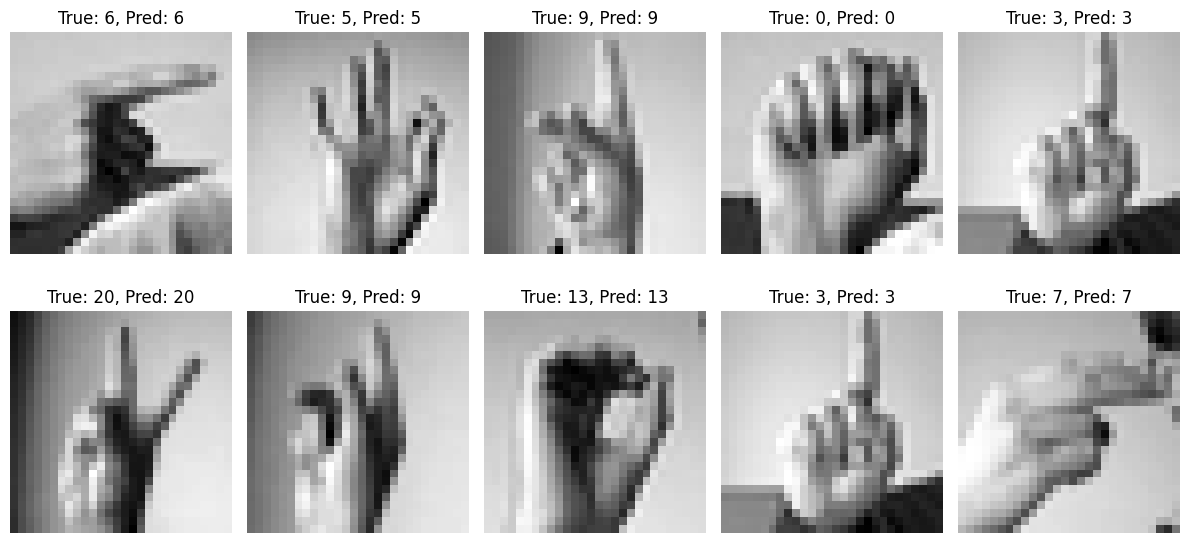

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from keras.models import load_model

# Cargar el modelo guardado
model = load_model('sign_language_model.h5')

# Cargar los datos de prueba
test_df = pd.read_csv('datasets/sign_mnist_test.csv')
test_label = test_df['label']
X_test = test_df.drop(['label'], axis=1).values.reshape(-1, 28, 28, 1) / 255.0

# Convertir etiquetas a formato one-hot
lb = LabelBinarizer()
y_test = lb.fit_transform(test_label)

# Evaluar el modelo
loss, acc = model.evaluate(X_test, y_test)
print(f'Model loaded successfully with accuracy: {acc*100:.2f}%')

# Predecir y mostrar algunas imágenes con sus predicciones
predictions = model.predict(X_test[:10])
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test[:10], axis=1)

# Mostrar las primeras 10 imágenes con sus etiquetas verdaderas y predichas
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.flatten()
for img, ax, true, pred in zip(X_test[:10], axes, true_classes, predicted_classes):
    ax.imshow(img.reshape(28, 28), cmap='gray')
    ax.axis('off')
    ax.set_title(f'True: {true}, Pred: {pred}')
plt.tight_layout()
plt.show()


In [2]:
import mediapipe as mp
import cv2
from collections import deque

# Inicializar Mediapipe
mp_hands = mp.solutions.hands
hands = mp_hands.Hands()
mp_drawing = mp.solutions.drawing_utils

# Captura de video
cap = cv2.VideoCapture(0)
detected_letters = deque(maxlen=20)  # Almacenará las letras detectadas
no_detection_counter = 0
MAX_NO_DETECTION_FRAMES = 50  # Número de cuadros sin detección para considerar el fin de la captura

try:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        result = hands.process(frame_rgb)

        if result.multi_hand_landmarks:
            no_detection_counter = 0  # Reiniciar el contador si se detectan manos
            for hand_landmarks in result.multi_hand_landmarks:
                mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

                h, w, c = frame.shape
                x_min = int(min([landmark.x for landmark in hand_landmarks.landmark]) * w)
                x_max = int(max([landmark.x for landmark in hand_landmarks.landmark]) * w)
                y_min = int(min([landmark.y for landmark in hand_landmarks.landmark]) * h)
                y_max = int(max([landmark.y for landmark in hand_landmarks.landmark]) * h)

                roi = frame[y_min:y_max, x_min:x_max]
                if roi.size == 0:
                    continue
                roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
                roi = cv2.resize(roi, (28, 28))
                roi = roi.reshape(1, 28, 28, 1) / 255.0

                prediction = model.predict(roi)
                class_id = np.argmax(prediction)
                class_name = lb.inverse_transform(np.array([class_id]))[0]

                detected_letters.append(class_name)
                cv2.putText(frame, class_name, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
        else:
            no_detection_counter += 1

        cv2.imshow('Hand Sign Recognition', frame)

        if no_detection_counter > MAX_NO_DETECTION_FRAMES:
            break

        if cv2.waitKey(5) & 0xFF == 27:
            break
finally:
    cap.release()
    cv2.destroyAllWindows()
    hands.close()

# Concatenar las letras detectadas
message = ''.join(detected_letters)
print("Mensaje capturado:", message)



Mensaje capturado: 


c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


KeyboardInterrupt: 

In [2]:
# Captura de video
cap = cv2.VideoCapture(0)
detected_letters = deque(maxlen=20)  # Almacenará las letras detectadas
no_detection_counter = 0
MAX_NO_DETECTION_FRAMES = 50  # Número de cuadros sin detección para considerar el fin de la captura

try:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        result = hands.process(frame_rgb)

        if result.multi_hand_landmarks:
            no_detection_counter = 0  # Reiniciar el contador si se detectan manos
            for hand_landmarks in result.multi_hand_landmarks:
                mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

                h, w, c = frame.shape
                x_min = int(min([landmark.x for landmark in hand_landmarks.landmark]) * w)
                x_max = int(max([landmark.x for landmark in hand_landmarks.landmark]) * w)
                y_min = int(min([landmark.y for landmark in hand_landmarks.landmark]) * h)
                y_max = int(max([landmark.y for landmark in hand_landmarks.landmark]) * h)

                roi = frame[y_min:y_max, x_min:x_max]
                if roi.size == 0:
                    continue
                roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
                roi = cv2.resize(roi, (28, 28))
                roi = roi.reshape(1, 28, 28, 1) / 255.0

                prediction = model.predict(roi)
                class_id = np.argmax(prediction)
                class_name = lb.inverse_transform(np.array([class_id]))[0]

                detected_letters.append(class_name)
                cv2.putText(frame, class_name, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
        else:
            no_detection_counter += 1

        cv2.imshow('Hand Sign Recognition', frame)

        if no_detection_counter > MAX_NO_DETECTION_FRAMES:
            break

        if cv2.waitKey(5) & 0xFF == 27:
            break
finally:
    cap.release()
    cv2.destroyAllWindows()
    hands.close()

# Concatenar las letras detectadas
message = ''.join(detected_letters)
print("Mensaje capturado:", message)

# Inicializar el pipeline de corrección de texto
from transformers import pipeline

corrector = pipeline("text2text-generation", model="t5-base")

def correct_text(input_text):
    corrected = corrector(f"fix spelling: {input_text}", max_length=50, num_return_sequences=1)
    return corrected[0]['generated_text']

# Corregir el mensaje capturado
corrected_message = correct_text(message)
print("Mensaje corregido:", corrected_message)

Mensaje capturado: 


c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\gabri\.cache\huggingface\hub\models--t5-base. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In

RuntimeError: Failed to import transformers.models.t5.modeling_tf_t5 because of the following error (look up to see its traceback):
Your currently installed version of Keras is Keras 3, but this is not yet supported in Transformers. Please install the backwards-compatible tf-keras package with `pip install tf-keras`.